In [25]:
#[:35039]
#Data Preprocessing
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
# Load the data
data = pd.read_csv('continuous dataset.csv')

# Convert timestamp to datetime format
data['datetime'] = data['datetime'][30000:35039].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))

# Set the datetime as index
data.set_index('datetime', inplace=True)

# Resample the data to hourly frequency
data = data.resample('H').mean()

# Create lag features
for i in range(1, 25):
    data['lag_{}'.format(i)] = data['nat_demand'].shift(i)

# Create rolling mean and standard deviation features
data['rolling_mean'] = data['nat_demand'].rolling(window=24).mean()
data['rolling_std'] = data['nat_demand'].rolling(window=24).std()

# Create weekday and hour features
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour

# Remove missing values
data.dropna(inplace=True)
train_size = int(len(data) * 0.8)
train_data = data[:train_size]/1000
test_data = data[train_size:]/1000

In [4]:
train_data

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean,rolling_std,weekday,hour
datetime,,,,,,,,,,,,,,,,,,,,,
2018-06-07 01:00:00,1.040336,0.027144,0.00002,0.000084,0.002773,0.024675,0.000019,0.000047,0.003666,0.023620,...,1.039792,1.032464,1.007889,0.998727,1.024335,1.071733,1.261023,0.176649,0.003,0.001
2018-06-07 02:00:00,1.018501,0.026944,0.00002,0.000096,0.003118,0.024600,0.000019,0.000061,0.003534,0.023451,...,1.189906,1.039792,1.032464,1.007889,0.998727,1.024335,1.260780,0.176993,0.003,0.002
2018-06-07 03:00:00,0.993786,0.026819,0.00002,0.000105,0.003323,0.024647,0.000019,0.000076,0.003463,0.023381,...,1.318682,1.189906,1.039792,1.032464,1.007889,0.998727,1.260574,0.177314,0.003,0.003
2018-06-07 04:00:00,0.991068,0.026768,0.00002,0.000108,0.003252,0.024737,0.000019,0.000078,0.003398,0.023362,...,1.368915,1.318682,1.189906,1.039792,1.032464,1.007889,1.259873,0.178386,0.003,0.004
2018-06-07 05:00:00,1.001883,0.026750,0.00002,0.000106,0.003153,0.024812,0.000019,0.000083,0.003376,0.023195,...,1.452708,1.368915,1.318682,1.189906,1.039792,1.032464,1.258599,0.180181,0.003,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-21 00:00:00,1.048992,0.026304,0.00002,0.000163,0.006058,0.025593,0.000020,0.000103,0.005793,0.023421,...,0.975817,0.952200,0.944608,0.960941,0.971742,1.008169,1.227654,0.189988,0.002,0.000
2018-11-21 01:00:00,1.017251,0.026245,0.00002,0.000171,0.005850,0.025511,0.000020,0.000066,0.006143,0.023300,...,0.996472,0.975817,0.952200,0.944608,0.960941,0.971742,1.229551,0.187534,0.002,0.001
2018-11-21 02:00:00,0.995418,0.026180,0.00002,0.000136,0.006366,0.025360,0.000020,0.000058,0.006355,0.023156,...,1.115891,0.996472,0.975817,0.952200,0.944608,0.960941,1.230987,0.185508,0.002,0.002


In [5]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(train_data['nat_demand'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(data)-1, typ='levels')
print(model_fit.summary())

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data['nat_demand'], predictions)
mse = mean_squared_error(test_data['nat_demand'], predictions)
rmse = np.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
ypred=predictions
y_test=test_data['nat_demand']
y_arima=ypred
#For MAE
mae=np.mean(np.abs(ypred-y_test))
print('MAE = {:.2f} (%)'.format(mae))

#For MAPE
def mean_absolute_percentage_error(y_test, ypred): 
    return np.mean(np.abs((y_test - ypred)/y_test))*100.
mape = mean_absolute_percentage_error(y_test, ypred)
print('MAPE = {:.2f} (%)'.format(mape))

# For RMSE
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,ypred) 
rsme=np.sqrt(mse) 
print('RSME = {:.2f} (%)'.format(rsme))

C:\Users\gulsh\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\gulsh\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\gulsh\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             nat_demand   No. Observations:                 4012
Model:                 ARIMA(5, 1, 0)   Log Likelihood                6944.360
Date:                Wed, 07 Jun 2023   AIC                         -13876.720
Time:                        15:46:48   BIC                         -13838.939
Sample:                    06-07-2018   HQIC                        -13863.329
                         - 11-21-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7562      0.013     56.556      0.000       0.730       0.782
ar.L2         -0.1257      0.020     -6.399      0.000      -0.164      -0.087
ar.L3          0.1180      0.022      5.413      0.0

In [6]:
#SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(train_data['nat_demand'], order=(5, 1, 0), seasonal_order=(0, 1, 1, 24))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(data)-1)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data['nat_demand'], predictions)
mse = mean_squared_error(test_data['nat_demand'], predictions)
rmse = np.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
ypred=predictions
y_test=test_data['nat_demand']

#For MAE
mae=np.mean(np.abs(ypred-y_test))
print('MAE = {:.2f} (%)'.format(mae))

#For MAPE
def mean_absolute_percentage_error(y_test, ypred): 
    return np.mean(np.abs((y_test - ypred)/y_test))*100.
mape = mean_absolute_percentage_error(y_test, ypred)
print('MAPE = {:.2f} (%)'.format(mape))

# For RMSE
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,ypred) 
rsme=np.sqrt(mse) 
print('RSME = {:.2f} (%)'.format(rsme))


C:\Users\gulsh\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\gulsh\anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


MAE: 0.07513780730612252
MSE: 0.010631909037974768
RMSE: 0.1031111489509004
MAE = 0.08 (%)
MAPE = 6.16 (%)
RSME = 0.10 (%)


In [7]:
#LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.losses import mean_squared_error

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Reshape the data for LSTM
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mae = history.history['val_loss'][-1]
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)

ypred=model.predict(X_test)
ypred = ypred.flatten() 
y_lstm=ypred
#For MAE
mae=np.mean(np.abs(ypred-y_test))
print('MAE = {:.2f} (%)'.format(mae))

#For MAPE
def mean_absolute_percentage_error(y_test, ypred): 
    return np.mean(np.abs((y_test - ypred)/y_test))*100.
mape = mean_absolute_percentage_error(y_test, ypred)
print('MAPE = {:.2f} (%)'.format(mape))

# For RMSE
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,ypred) 
rsme=np.sqrt(mse) 
print('RSME = {:.2f} (%)'.format(rsme))


Epoch 1/50
63/63 [==============================] - 5s 17ms/step - loss: 0.2530 - val_loss: 0.0273
Epoch 2/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.0205
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0121
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0083 - val_loss: 0.0068
Epoch 5/50
63/63 [==============================] - 0s 4ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 8/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 9/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 10/50
63/63 [==============================] - 0s 5ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 11/50
63/63 

In [8]:
#CNN-LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Reshape the data for CNN-LSTM
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Flatten())
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mae = history.history['val_loss'][-1]
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)

ypred=model.predict(X_test)
y_cnnlstm=ypred
#For MAE
mae = np.mean(np.abs(ypred.ravel() - y_test.ravel()))
print('MAE = {:.2f} (%)'.format(mae))

#For MAPE
mape = np.mean(np.abs((y_test.ravel() - ypred.ravel()) / y_test.ravel())) * 100
print('MAPE = {:.2f} (%)'.format(mape))


# For RMSE
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,ypred) 
rsme=np.sqrt(mse) 
print('RSME = {:.2f} (%)'.format(rsme))

Epoch 1/50
63/63 [==============================] - 4s 26ms/step - loss: 0.1074 - val_loss: 0.0309
Epoch 2/50
63/63 [==============================] - 1s 19ms/step - loss: 0.0268 - val_loss: 0.0229
Epoch 3/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0182 - val_loss: 0.0119
Epoch 4/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0074 - val_loss: 0.0046
Epoch 5/50
63/63 [==============================] - 1s 19ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 6/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 7/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0033 - val_loss: 0.0031
Epoch 8/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 10/50
63/63 [==============================] - 1s 18ms/step - loss: 0.0026 - val_loss: 0.0025
Epoch 11/

In [9]:
#Attention
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout, Attention
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Reshape the data 
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the input shape
input_shape = (X_train.shape[1], 1)

# Define the model
inputs = Input(shape=input_shape)
conv1 = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
pool1 = MaxPooling1D(pool_size=2)(conv1)
lstm1 = LSTM(64, return_sequences=True)(pool1)
attention = Attention()([lstm1, lstm1])
flatten = Flatten()(attention)
dropout = Dropout(0.2)(flatten)
outputs = Dense(1)(dropout)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='mse', optimizer=Adam())

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
mae = history.history['val_loss'][-1]
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)

ypred = model.predict(X_test)
y_attention=ypred
#For MAE
mae = np.mean(np.abs(ypred.ravel() - y_test.ravel()))
print('MAE = {:.2f} (%)'.format(mae))

#For MAPE
mape = np.mean(np.abs((y_test.ravel() - ypred.ravel()) / y_test.ravel())) * 100
print('MAPE = {:.2f} (%)'.format(mape))


# For RMSE
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,ypred) 
rsme=np.sqrt(mse) 
print('RSME = {:.2f} (%)'.format(rsme))

Epoch 1/50
63/63 [==============================] - 4s 33ms/step - loss: 0.1064 - val_loss: 0.0326
Epoch 2/50
63/63 [==============================] - 2s 24ms/step - loss: 0.0343 - val_loss: 0.0304
Epoch 3/50
63/63 [==============================] - 2s 25ms/step - loss: 0.0318 - val_loss: 0.0280
Epoch 4/50
63/63 [==============================] - 2s 25ms/step - loss: 0.0277 - val_loss: 0.0224
Epoch 5/50
63/63 [==============================] - 1s 24ms/step - loss: 0.0195 - val_loss: 0.0093
Epoch 6/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0083 - val_loss: 0.0044
Epoch 7/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0064 - val_loss: 0.0032
Epoch 8/50
63/63 [==============================] - 1s 23ms/step - loss: 0.0057 - val_loss: 0.0060
Epoch 9/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0056 - val_loss: 0.0028
Epoch 10/50
63/63 [==============================] - 2s 24ms/step - loss: 0.0047 - val_loss: 0.0028
Epoch 11/

In [10]:
#Transformer
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Define the input shape
seq_len = X_train.shape[1]
n_features = 1

# Reshape the data for Transformer
X_train = X_train.values.reshape(X_train.shape[0], seq_len, n_features)
X_test = X_test.values.reshape(X_test.shape[0], seq_len, n_features)

# Define the Transformer model
inputs = Input(shape=(seq_len, n_features))
x = inputs

# Add self-attention layers
for _ in range(2):
    x = tf.keras.layers.MultiHeadAttention(num_heads=8, key_dim=32)(x, x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Dropout(0.1)(x)
    x = tf.keras.layers.Dense(32, activation="relu")(x)

# Flatten and add output layer
x = tf.keras.layers.Flatten()(x)
outputs = Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Evaluate the model
mae = history.history['val_loss'][-1]
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)

ypred = model.predict(X_test)
y_transformer=ypred
#For MAE
mae = np.mean(np.abs(ypred.ravel() - y_test.ravel()))
print('MAE = {:.2f} (%)'.format(mae))

#For MAPE
mape = np.mean(np.abs((y_test.ravel() - ypred.ravel()) / y_test.ravel())) * 100
print('MAPE = {:.2f} (%)'.format(mape))


# For RMSE
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(y_test,ypred) 
rsme=np.sqrt(mse) 
print('RSME = {:.2f} (%)'.format(rsme))

Epoch 1/50
63/63 [==============================] - 11s 120ms/step - loss: 1.4149 - val_loss: 1.3577
Epoch 2/50
63/63 [==============================] - 8s 132ms/step - loss: 1.2734 - val_loss: 1.2211
Epoch 3/50
63/63 [==============================] - 8s 120ms/step - loss: 1.1430 - val_loss: 1.0954
Epoch 4/50
63/63 [==============================] - 8s 127ms/step - loss: 1.0232 - val_loss: 0.9799
Epoch 5/50
63/63 [==============================] - 7s 114ms/step - loss: 0.9135 - val_loss: 0.8743
Epoch 6/50
63/63 [==============================] - 7s 112ms/step - loss: 0.8132 - val_loss: 0.7779
Epoch 7/50
63/63 [==============================] - 7s 112ms/step - loss: 0.7218 - val_loss: 0.6902
Epoch 8/50
63/63 [==============================] - 7s 113ms/step - loss: 0.6388 - val_loss: 0.6104
Epoch 9/50
63/63 [==============================] - 7s 112ms/step - loss: 0.5637 - val_loss: 0.5385
Epoch 10/50
63/63 [==============================] - 7s 112ms/step - loss: 0.4960 - val_loss: 0.473

In [11]:
#CNN LeNet
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten

In [12]:
#LeNet-LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

from sklearn.metrics import mean_squared_error

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Reshape the data for CNN-LSTM
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LeNet model
model = models.Sequential()
model.add(layers.Conv1D(6, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(16, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))

# Add LSTM layer
model.add(layers.Reshape((7, 12)))  # Reshape the output of dense layers for compatibility with LSTM
model.add(layers.LSTM(84, return_sequences=False))

model.add(layers.Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions on new data
predictions = model.predict(X_test)
ypred = predictions.flatten()
y_lelstm=ypred
# For MAE
mae = np.mean(np.abs(ypred - y_test))
print('MAE = {:.2f} (%)'.format(mae))

# For MAPE
mape = np.mean(np.abs((y_test - ypred) / y_test)) * 100
print('MAPE = {:.2f} (%)'.format(mape))

# For RMSE
mse = mean_squared_error(y_test, ypred) 
rmse = np.sqrt(mse) 
print('RMSE = {:.2f} (%)'.format(rmse))


Epoch 1/50
126/126 [==============================] - 4s 8ms/step - loss: 0.1004
Epoch 2/50
126/126 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 3/50
126/126 [==============================] - 1s 8ms/step - loss: 0.0023
Epoch 4/50
126/126 [==============================] - 1s 8ms/step - loss: 0.0020
Epoch 5/50
126/126 [==============================] - 1s 9ms/step - loss: 0.0017
Epoch 6/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 7/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 8/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 9/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 10/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0013
Epoch 11/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 12/50
126/126 [==============================] - 1s 10ms/step - loss: 0.0012
Epoch 13/50
126/12

In [13]:
#GoogleNet Lstm
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

from sklearn.metrics import mean_squared_error

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Reshape the data for CNN-LSTM
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the GoogleNet-LSTM model
def inception_module(x, filters):
    branch1x1 = layers.Conv1D(filters[0], 1, activation='relu', padding='same')(x)
    
    branch3x3 = layers.Conv1D(filters[1], 1, activation='relu', padding='same')(x)
    branch3x3 = layers.Conv1D(filters[2], 3, activation='relu', padding='same')(branch3x3)
    
    branch5x5 = layers.Conv1D(filters[3], 1, activation='relu', padding='same')(x)
    branch5x5 = layers.Conv1D(filters[4], 5, activation='relu', padding='same')(branch5x5)
    
    branch_pool = layers.MaxPooling1D(3, strides=1, padding='same')(x)
    branch_pool = layers.Conv1D(filters[5], 1, activation='relu', padding='same')(branch_pool)
    
    output = layers.concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

input_shape = (X_train.shape[1], X_train.shape[2])  # Adjust input shape as per your requirements

input_layer = layers.Input(shape=input_shape)
x = layers.Conv1D(6, kernel_size=5, activation='relu', padding='same')(input_layer)
x = layers.MaxPooling1D(pool_size=2)(x)
x = layers.Conv1D(16, kernel_size=5, activation='relu', padding='same')(x)
x = layers.MaxPooling1D(pool_size=2)(x)

# Replace fully connected layers with Inception modules
x = inception_module(x, [6, 6, 8, 2, 4, 4])
x = inception_module(x, [16, 8, 12, 4, 8, 8])

x = layers.LSTM(84, return_sequences=True)(x)
x = layers.Flatten()(x)
x = layers.Dense(1, activation='linear')(x)

model = models.Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(X_test)

ypred = predictions.flatten()
y_glstm=ypred
# For MAE
mae = np.mean(np.abs(ypred - y_test))
print('MAE = {:.2f} (%)'.format(mae))

# For MAPE
mape = np.mean(np.abs((y_test - ypred) / y_test)) * 100
print('MAPE = {:.2f} (%)'.format(mape))

# For RMSE
mse = mean_squared_error(y_test, ypred) 
rmse = np.sqrt(mse) 
print('RMSE = {:.2f} (%)'.format(rmse))


Epoch 1/100
126/126 [==============================] - 7s 13ms/step - loss: 0.1277
Epoch 2/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0082
Epoch 3/100
126/126 [==============================] - 2s 14ms/step - loss: 0.0020
Epoch 4/100
126/126 [==============================] - 2s 16ms/step - loss: 0.0018
Epoch 5/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0016
Epoch 6/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0014
Epoch 7/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0013
Epoch 8/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0012
Epoch 9/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0013
Epoch 10/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0011
Epoch 11/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0012
Epoch 12/100
126/126 [==============================] - 2s 17ms/step - loss: 0.0010
E

Epoch 95/100
126/126 [==============================] - 2s 17ms/step - loss: 6.7351e-04
Epoch 96/100
126/126 [==============================] - 2s 17ms/step - loss: 5.1474e-04
Epoch 97/100
126/126 [==============================] - 2s 17ms/step - loss: 5.2549e-04
Epoch 98/100
126/126 [==============================] - 2s 17ms/step - loss: 5.2650e-04
Epoch 99/100
126/126 [==============================] - 2s 17ms/step - loss: 5.8021e-04
Epoch 100/100
32/32 [==============================] - 1s 7ms/step - loss: 6.3727e-04
Test loss: 0.0006372667266987264
32/32 [==============================] - 1s 6ms/step
MAE = 0.02 (%)
MAPE = 1.61 (%)
RMSE = 0.03 (%)


In [26]:
#ResNet_LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers

from sklearn.metrics import mean_squared_error

# Prepare the train and test data
X_train, y_train = train_data.drop('nat_demand', axis=1), train_data['nat_demand']
X_test, y_test = test_data.drop('nat_demand', axis=1), test_data['nat_demand']

# Reshape the data for CNN-LSTM
X_train = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the ResNet-LSTM model
def residual_block(x, filters):
    shortcut = x
    
    x = layers.Conv1D(filters[0], 1, activation='relu', padding='same')(x)
    x = layers.Conv1D(filters[1], 3, activation='relu', padding='same')(x)
    x = layers.Conv1D(filters[2], 1, padding='same')(x)
    
    shortcut = layers.Conv1D(filters[2], 1, padding='same')(shortcut)
    
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    
    return x

input_shape = (X_train.shape[1], X_train.shape[2])  # Adjust input shape as per your requirements

input_layer = layers.Input(shape=input_shape)
x = layers.Conv1D(6, kernel_size=5, activation='relu', padding='same')(input_layer)
x = layers.MaxPooling1D(pool_size=2)(x)

# Replace Inception modules with residual blocks
x = residual_block(x, [6, 6, 8])
x = residual_block(x, [6, 6, 8])

x = layers.LSTM(84, return_sequences=True)(x)
x = layers.Flatten()(x)
x = layers.Dense(1, activation='linear')(x)

model = models.Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)

# Make predictions
predictions = model.predict(X_test)

ypred = predictions.flatten()
y_test = test_data['nat_demand']
y_rlstm = ypred

# For MAE
mae = np.mean(np.abs(ypred - y_test))
print('MAE = {:.2f} (%)'.format(mae))

# For MAPE
mape = np.mean(np.abs((y_test - ypred) / y_test)) * 100
print('MAPE = {:.2f} (%)'.format(mape))

# For RMSE
mse = mean_squared_error(y_test, ypred) 
rmse = np.sqrt(mse) 
print('RMSE = {:.2f} (%)'.format(rmse))


Epoch 1/100
126/126 [==============================] - 8s 26ms/step - loss: 0.1323
Epoch 2/100
126/126 [==============================] - 3s 24ms/step - loss: 0.0177
Epoch 3/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0049
Epoch 4/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0034
Epoch 5/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0032
Epoch 6/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0030
Epoch 7/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0026
Epoch 8/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0024
Epoch 9/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0023
Epoch 10/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0021
Epoch 11/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0020
Epoch 12/100
126/126 [==============================] - 3s 23ms/step - loss: 0.0019
E

126/126 [==============================] - 3s 23ms/step - loss: 6.6056e-04
Epoch 97/100
126/126 [==============================] - 3s 23ms/step - loss: 6.8348e-04
Epoch 98/100
126/126 [==============================] - 3s 23ms/step - loss: 7.0184e-04
Epoch 99/100
126/126 [==============================] - 3s 23ms/step - loss: 6.2753e-04
Epoch 100/100
32/32 [==============================] - 1s 10ms/step - loss: 6.4778e-04
Test loss: 0.0006477820570580661
32/32 [==============================] - 1s 9ms/step
MAE = 0.02 (%)
MAPE = 1.52 (%)
RMSE = 0.03 (%)


In [18]:
#   Jan 35017 to 35760   744
#   Feb 35761 to 36432   672
#   Mar 36433 to 37176   744
#   Apr 37177 to 37896   720
#   May 37897 to 38640   744
#   Jun 38641 to 39360   720
#   Jul 39361 to 40104   744
#   Aug 40105 to 40848   744
#   Sep 40849 to 41568   720
#   Oct 41569 to 42312   744
#   Nov 42313 to 43032   720
#   Dec 43033 to 43776   744
jan=0
feb=744
mar=feb+672 
apr=mar+744
may=apr+720
jun=may+744
jul=jun+720
aug=jul+744
sep=aug+744
oct=sep+720
nov=oct+744
dec=nov+720

In [19]:
# Enter day and month for prediction year 2019
day=3
month=jan

In [21]:
t=y_test[((24*(day-1)+month)+14):24+24*(day-1)+(month)+14,]*1000
yarima=y_arima[24*(day-1)+month+14:(24+24*(day-1)+month)+14,]*1000
ylstm=y_lstm[24*(day-1)+month+14:(24+24*(day-1)+month+14),]*1000
ycnnlstm=y_cnnlstm[24*(day-1)+14+month:(24+24*(day-1)+month+14),]*1000
yattention=y_attention[24*(day-1)+14+month:(24+24*(day-1)+month+14),]*1000
ytransformer=y_transformer[24*(day-1)+14+month:(24+24*(day-1)+month+14),]*1000
ylenet=y_lenet[24*(day-1)+month+14:(24+24*(day-1)+month+14),]*1000
ylelstm=y_lelstm[24*(day-1)+month+14:(24+24*(day-1)+month+14),]*1000
yglstm=y_glstm[24*(day-1)+month+14:(24+24*(day-1)+month+14),]*1000
yrlstm=y_rlstm[24*(day-1)+month+14:(24+24*(day-1)+month+14),]*1000
inpu=pd.read_csv('test.csv').dropna()
inp=inpu['Hour'].dropna()
ho=inpu['no']
x=inp[:24]


In [22]:
print(t)

datetime
2018-11-23 19:00:00    1362.3012
2018-11-23 20:00:00    1309.1407
2018-11-23 21:00:00    1258.0981
2018-11-23 22:00:00    1207.1816
2018-11-23 23:00:00    1139.7484
2018-11-24 00:00:00    1083.9056
2018-11-24 01:00:00    1038.2840
2018-11-24 02:00:00    1010.8227
2018-11-24 03:00:00     960.9130
2018-11-24 04:00:00     959.2067
2018-11-24 05:00:00     974.2957
2018-11-24 06:00:00     966.8599
2018-11-24 07:00:00    1056.4378
2018-11-24 08:00:00    1203.1155
2018-11-24 09:00:00    1296.7585
2018-11-24 10:00:00    1366.2978
2018-11-24 11:00:00    1405.6951
2018-11-24 12:00:00    1392.0578
2018-11-24 13:00:00    1359.1911
2018-11-24 14:00:00    1352.2186
2018-11-24 15:00:00    1327.4980
2018-11-24 16:00:00    1290.3586
2018-11-24 17:00:00    1271.7576
2018-11-24 18:00:00    1347.0801
Name: nat_demand, dtype: float64


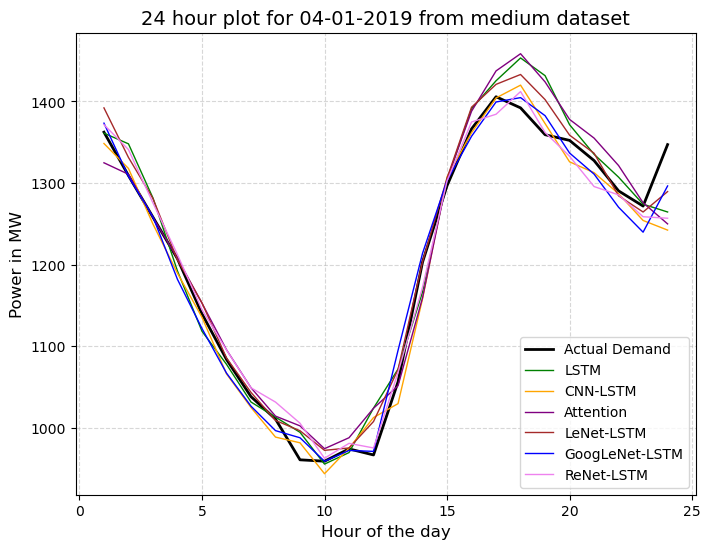

In [24]:
import matplotlib.pyplot as plt
import numpy as np


# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the true data
ax.plot(x, t, label="Actual Demand", color="black", linewidth=2)

# Plot the additional lines

ax.plot(x, ylstm, label="LSTM", color="green", linestyle="-", linewidth=1)
ax.plot(x, ycnnlstm, label="CNN-LSTM", color="orange", linestyle="-", linewidth=1)
ax.plot(x, yattention, label="Attention", color="purple", linestyle="-", linewidth=1)

ax.plot(x, ylenet, label="LeNet", color="cyan", linestyle="-", linewidth=1)
ax.plot(x, ylelstm, label="LeNet-LSTM", color="brown", linestyle="-", linewidth=1)
ax.plot(x, yglstm, label="GoogLeNet-LSTM", color="blue", linestyle="-", linewidth=1)
ax.plot(x, yrlstm, label="ReNet-LSTM", color="violet", linestyle="-", linewidth=1)
# Set axis labels and title
ax.set_xlabel("Hour of the day", fontsize=12)
ax.set_ylabel("Power in MW", fontsize=12)
ax.set_title("24 hour plot for 04-01-2019 from medium dataset", fontsize=14)

# Customize tick labels and grid
ax.tick_params(axis="both", which="major", labelsize=10)
ax.grid(True, linestyle="--", alpha=0.5)

# Add legend
ax.legend(fontsize=10)

# Save the figure if needed
# plt.savefig("impressive_graph.png")
plt.savefig("Panama houly large-dataset.png")
# Show the plot
plt.show()


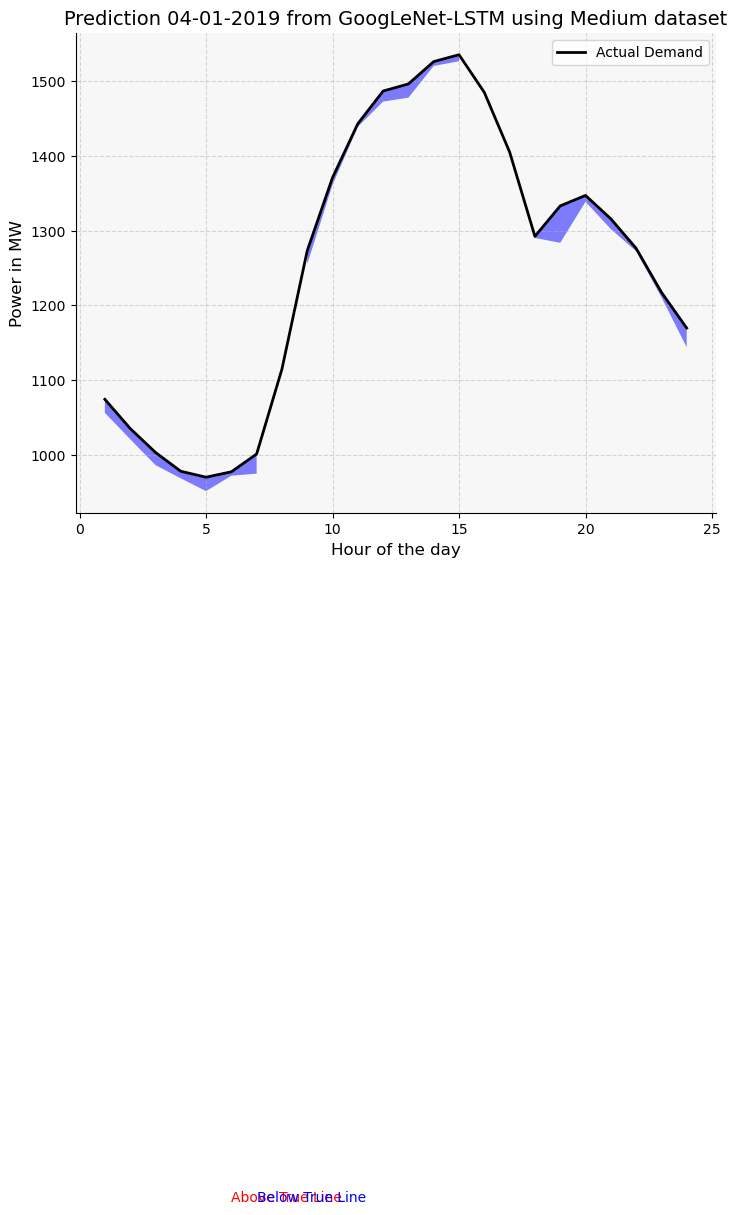

In [479]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the true data
ax.plot(x, t, label="Actual Demand", color="black", linewidth=2)

# Plot the SVM data with a shaded area
ax.fill_between(x, t, yglstm, where=(yglstm >= t), facecolor="red", alpha=0.5)
ax.fill_between(x, t, yglstm, where=(yglstm < t), facecolor="blue", alpha=0.5)

# Set axis labels and title
ax.set_xlabel("Hour of the day", fontsize=12)
ax.set_ylabel("Power in MW", fontsize=12)
ax.set_title("Prediction 04-01-2019 from GoogLeNet-LSTM using Medium dataset", fontsize=14)

# Customize tick labels and grid
ax.tick_params(axis="both", which="major", labelsize=10)
ax.grid(True, linestyle="--", alpha=0.5)

# Add legend
ax.legend(fontsize=10)

# Add additional decorations or annotations if desired
# For example, add text annotations
ax.text(6, 0.8, "Above True Line", fontsize=10, color="red")
ax.text(7, 1, "Below True Line", fontsize=10, color="blue")

# Remove spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Customize plot background
ax.set_facecolor("#f7f7f7")

# Adjust plot margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Save the figure if needed
plt.savefig("Panama_large_glstm.png")

# Show the plot
plt.show()
